# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 19 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [91]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [94]:
name=['Хи-квадрат','Гаусовское','Пуассоновское']
arr=np.array([stats.chi2.rvs(df=3,size=500),stats.norm.rvs(loc=1, scale=2,size=500),stats.poisson.rvs(10, size=500)])
for i in range(len(name)):
    k=float(stats.tmin(arr[i]))
    k1=float(stats.tmax(arr[i]))
    print(name[i])
    print('среднее=',round(stats.tmean(arr[i]),3),', минимум=', round(k,3) ,', максимум=', round(k1,3),
          ', дисперсия=',round(stats.tstd(arr[i])**2,3),', смещенность=',round(stats.skew(arr[i]),3),
          ', крутизна=',round(stats.kurtosis(arr[i]),3))
    print()

Хи-квадрат
среднее= 2.971 , минимум= 0.021 , максимум= 20.913 , дисперсия= 6.285 , смещенность= 2.112 , крутизна= 7.892

Гаусовское
среднее= 1.002 , минимум= -4.929 , максимум= 6.73 , дисперсия= 4.059 , смещенность= -0.035 , крутизна= -0.262

Пуассоновское
среднее= 10.12 , минимум= 3.0 , максимум= 21.0 , дисперсия= 10.338 , смещенность= 0.459 , крутизна= 0.025



**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

In [95]:
ch,norm1,pois=arr[0],arr[1],arr[2]

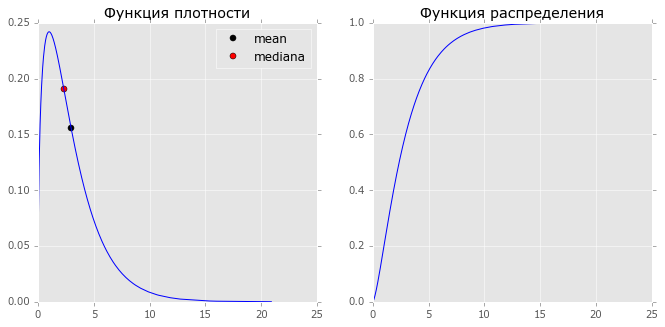

In [96]:
#Хи-квадрат
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
fig, ax = plt.subplots(1,2)
fig.set_size_inches(11,5)

x=np.sort(ch)

prob_mass = stats.chi2.pdf(x,df=3)
prob = stats.chi2.cdf(x, df=3)

x1=[np.mean(x), (stats.chi2.pdf(np.mean(x),df=3))]
x2=[x[255],(stats.chi2.pdf(x[255],df=3))]
ax[0].plot(x1[0],x1[1],'ro',color="black",label='mean')
ax[0].plot(x2[0],x2[1],'ro',color="red",label='mediana')

ax[0].legend(loc='upper right', numpoints=1)
ax[0].plot(x,prob_mass,'blue')
ax[1].plot(x, prob,"blue")

ax[0].set_title(u'Функция плотности')
ax[1].set_title(u'Функция распределения')


Мы просто взяли и подставили наши сгенерированные значения в функцию плотности для хи-квадрат. Посмотрим, как выглядит выборочная функция распределения. Для этого найдем P(X<x).

Аналогично поступим для остальных распределений

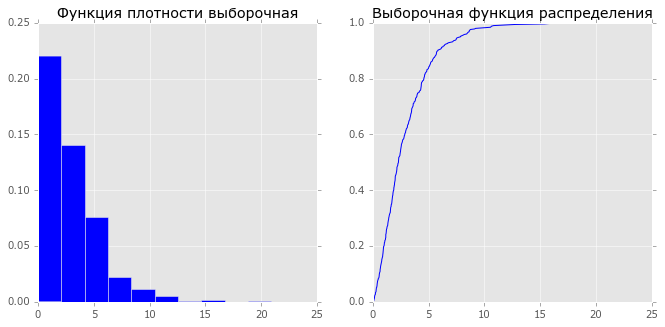

In [97]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(11,5)
P_x=[]
for i in range(len(x)):
    P_x.append((i+1)/len(x))
ax[0].hist(x,color="blue",normed=True)
ax[1].plot(x,P_x,color="blue")
ax[0].set_title(u'Функция плотности выборочная')
ax[1].set_title(u'Выборочная функция распределения')    

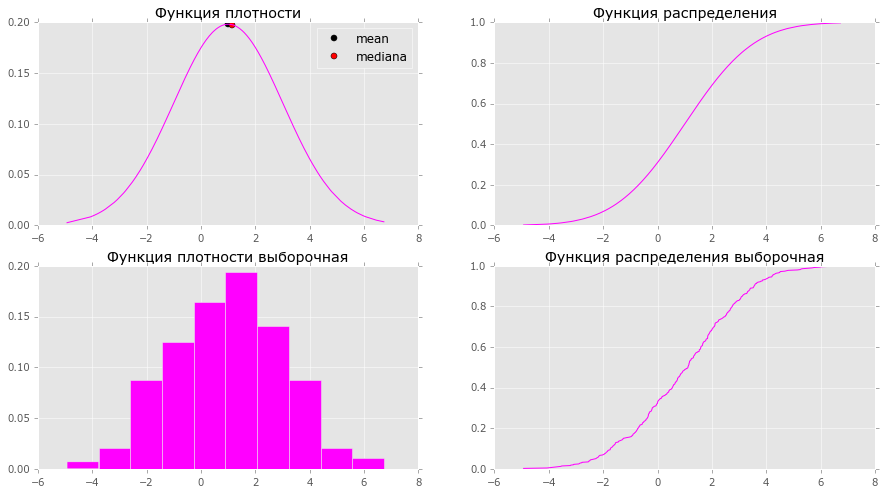

In [98]:
#Гаусовское
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,8)
x=np.sort(norm1)
P_x=[]
for i in range(len(x)):
    P_x.append((i+1)/len(x))

prob_mass = stats.norm.pdf(x, np.mean(norm1),np.std(norm1))
prob = stats.norm.cdf(x, np.mean(x),np.std(x))
x1=[np.mean(x), (stats.norm.pdf(np.mean(x),np.mean(x),np.std(x)))]
x2=[x[255],(stats.norm.pdf(x[255],np.mean(x),np.std(x)))]
ax[0][0].plot(x1[0],x1[1],'ro',color="black",label='mean')
ax[0][0].plot(x2[0],x2[1],'ro',color="red",label='mediana')
ax[0][0].legend(loc='upper right', numpoints=1)
ax[0][0].plot(x,prob_mass,"magenta",)
ax[0][1].plot(x, prob,"magenta")

ax[0][0].set_title(u'Функция плотности')
ax[0][1].set_title(u'Функция распределения')

ax[1][0].hist(x,color="magenta",normed=True,)
ax[1][1].plot(x,P_x,color="magenta")
ax[1][0].set_title(u'Функция плотности выборочная')
ax[1][1].set_title(u'Функция распределения выборочная')


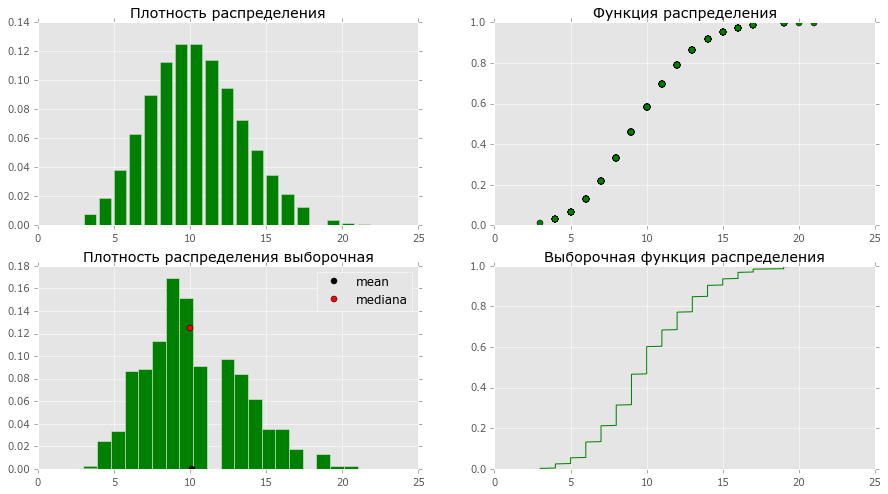

In [99]:
#Распределение Пуасона
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,8)
x=np.sort(pois)
prob_dens = stats.poisson.pmf(x, 10)
prob = stats.poisson.cdf(x, 10)

x1=[np.mean(x), (stats.poisson.pmf(np.mean(x),10))]
x2=[x[255],(stats.poisson.pmf(x[255],10))]
ax[1][0].plot(x1[0],x1[1],'ro',color="black",label='mean')
ax[1][0].plot(x2[0],x2[1],'ro',color="red",label='mediana')
ax[1][0].legend(loc='upper right', numpoints=1)

ax[0][0].bar(x, prob_dens, color="green")
ax[0][1].plot(x, prob,'ro',color="green")

ax[0][0].set_title(u'Плотность распределения')
ax[0][1].set_title(u'Функция распределения')
P_x=[]
for i in range(len(x)):
    P_x.append((i+1)/len(x))
ax[1][0].hist(x,bins = 20,color="green",normed=True)
ax[1][1].plot(x,P_x,color="green")
ax[1][0].set_title(u'Плотность распределения выборочная')
ax[1][1].set_title(u'Выборочная функция распределения')


**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [100]:
print('хи-квадра:',stats.describe(ch))
print()
print('Гаусовское:',stats.describe(norm1))
print()
print('Пуасон:',stats.describe(pois))

хи-квадра: DescribeResult(nobs=500, minmax=(0.020831395959205423, 20.913399877397428), mean=2.9712019315882645, variance=6.2849922743389399, skewness=2.112010356330859, kurtosis=7.891745676091654)

Гаусовское: DescribeResult(nobs=500, minmax=(-4.9290941161884527, 6.7297295481917683), mean=1.0022754850135485, variance=4.0587160007608318, skewness=-0.03486379021311322, kurtosis=-0.26181591189943143)

Пуасон: DescribeResult(nobs=500, minmax=(3.0, 21.0), mean=10.119999999999999, variance=10.338276553106212, skewness=0.45888329273954526, kurtosis=0.024705143655866735)


## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

In [ ]:
Корреляция Спирмена применяется для двух ранговых переменных( или если хотя бы одна переменная - ранговая).
Коэффициент пирсона применяется для измерения корреляции двух метрических величин

In [2]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [3]:
import scipy as sp
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
d=pd.read_csv("beauty.csv", sep=';')
d.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [16]:
names=['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks']
name_features=[]
cor=[]
sign=[]

for i in range(len(names)):
    for j in range(i+1,len(names)):
        name_features.append(names[i]+'-'+names[j])
        corr=(sp.stats.pearsonr(d[names[i]],d[names[j]]))
        cor.append(abs(corr[0])) 
        if corr[0]<0:
            sign.append(-1)
        else:
            sign.append(1)
t=pd.DataFrame({'name_features':name_features,'correlation':cor,'sing':sign}).sort_values('correlation',ascending=False)
i=0
while i<3:
    c=t.iloc[i]
    
    print('correlation ', c[1],'=',round(c[0],3)*round(c[2]))
    i=i+1


correlation  female-married = -0.319
correlation  wage-female = -0.313
correlation  service-educ = 0.302


**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

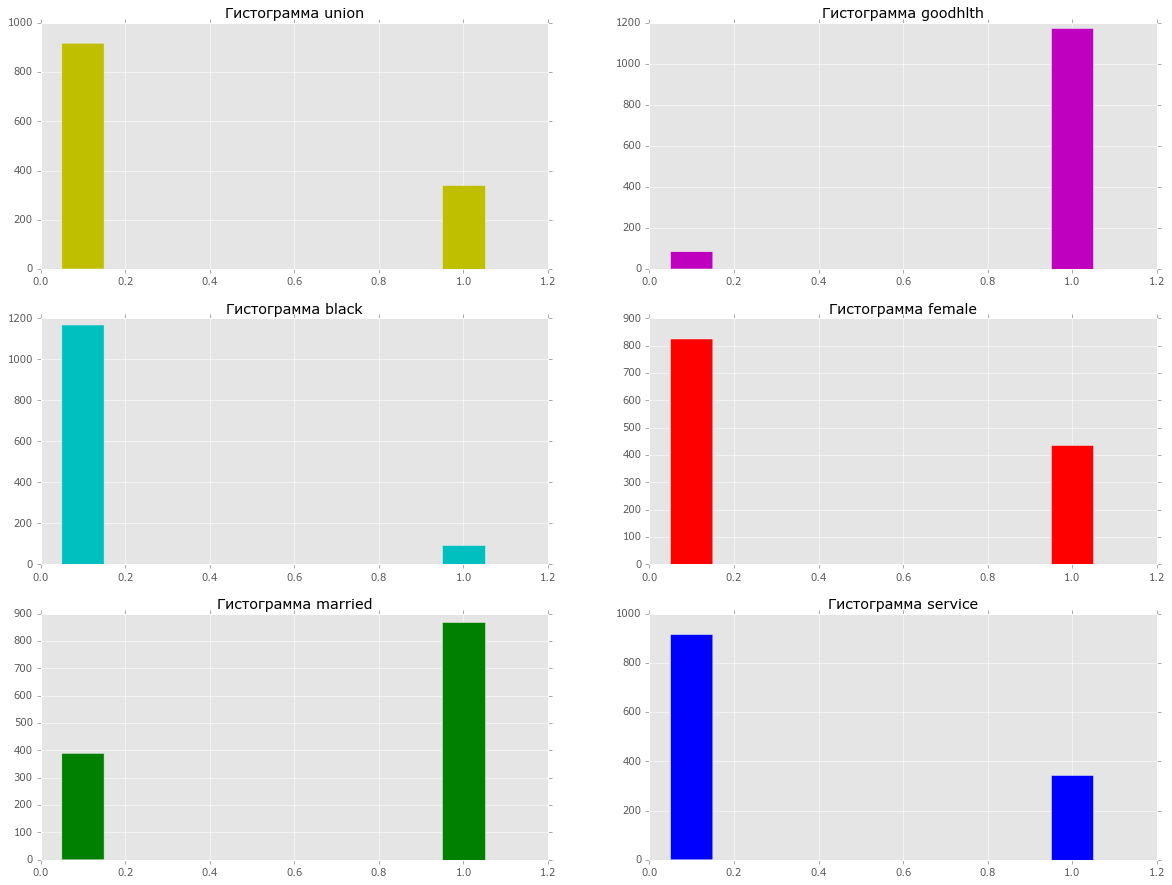

In [65]:
import sympy
#'union', 'goodhlth', 'black', 'female', 'married', 'service'-бернулевский закон распределения
fig, ax = plt.subplots(3,2)
fig.set_size_inches(20,15)
c=['union', 'goodhlth', 'black', 'female', 'married', 'service']
k=[[0,0],[0,1],[1,0],[1,1],[2,0],[2,1]]
colors=['y','m','c','r','g','b']
j=0
for i in c:
    j1=k[j][0]
    j2=k[j][1]
    ax[j1][j2].hist(d[i],bins=10,color=colors[j],align='right')
    ax[j1][j2].set_title('Гистограмма '+ i)
    j=j+1
    
    

In [19]:
#мы знаем, что это бернулевское распределениее X~bernoulli(1,p). Видимо, к нему не применим метод fit. Воспользуемся ММП для вычисления р
c=['union', 'goodhlth', 'black', 'female', 'married', 'service']
for i in c:
    n=len(d[d[i]==1])
    m=len(d[i])-n
    p=sympy.Symbol('p')
    L=sympy.diff(((1-p)**m)*(p**n), p)
    print(i,'~ bernoulli(1,',sympy.solve(L,p)[1],')')
    
    

union ~ bernoulli(1, 49/180 )
goodhlth ~ bernoulli(1, 14/15 )
black ~ bernoulli(1, 31/420 )
female ~ bernoulli(1, 109/315 )
married ~ bernoulli(1, 871/1260 )
service ~ bernoulli(1, 23/84 )


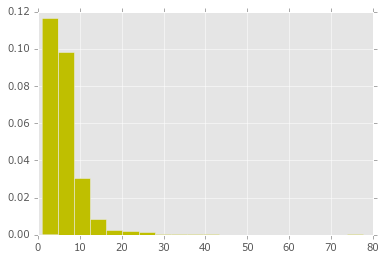

wage ~ pareto (a= 0.610361284169 )


In [62]:
#wage
plt.hist(d['wage'],bins=20,color='y',normed=True)
plt.show()#похоже на Степенной закон
arr=stats.pareto.fit(d['wage'])
a=arr[0]
mu=arr[1]
std=arr[2]
print('wage ~ pareto (a=',arr[0],')')

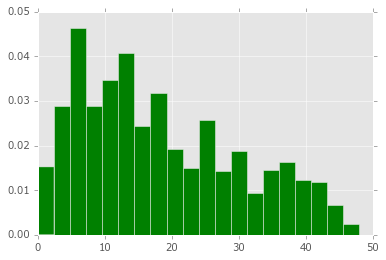

exper ~ chi2 (df= 4.15415390907 )


In [61]:
#exper
plt.hist(d['exper'],bins=20,color='g',normed=True)
plt.show()#похоже на хи-квадрат
arr=stats.chi2.fit(d['exper'])

print('exper ~ chi2 (df=',arr[0],')')

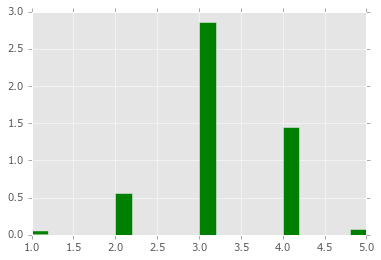

looks~ Poisson(l= 3.186 )


In [36]:
#looks
from scipy.special import factorial

plt.hist(d['looks'],bins=20,color='g',normed=True)
plt.show()#Распределение Пуассона. оценим  ММП
x=[float(i) for i in d['looks']]
l=sympy.Symbol('l')
n=len(x)
Ln=sympy.diff(-n*l+sum(x)*sympy.ln(l),l)

print('looks~ Poisson(l=',round(sympy.solve(Ln,l)[0],3),')')

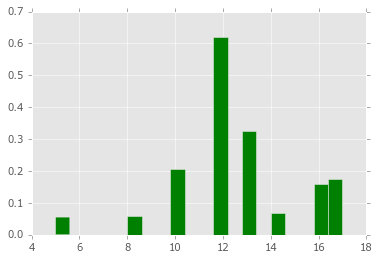

educ ~ norm(mu= 12.5634920635 , std= 2.62344748268 )


In [57]:
#educ
plt.hist(d['educ'],bins=20,color='g',normed=True)
plt.show()
#нормальное распределение
print('educ ~ norm(mu=',stats.norm.fit(d['educ'])[0],', std=',stats.norm.fit(d['educ'])[1],')')

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [ ]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [262]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [263]:
categories = ['talk.politics.guns', 'talk.politics.mideast']

text = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=0)


text_train,text_test,y_train, y_test=train_test_split(text.data,text.target,test_size =0.3)

text_all=text.data


**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [285]:
text = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)

In [286]:
text.fit(text_all)
X_train = text.transform(text_train)
X_test  = text.transform(text_test)


**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [288]:
words=text.get_feature_names()
len(words)
result_data=X_train.data
result_indices=X_train.indices

#cjhnbhetv слова по убыванию частоты.
d=pd.DataFrame({'result_data':result_data,'result_indices':result_indices}).sort_values('result_data',ascending=False)

#во многих документах одно и тоже слово может входить несколько раз, 
#поэтому оставляем только максимальное значение частты этого слова
d=d.drop_duplicates(subset='result_indices').head(50)
d

,result_data,result_indices
70943,289,10548
37751,102,24236
71030,98,11781
37312,93,13944
8750,70,18380
8281,62,8492
28211,61,1
60470,61,21107
70659,59,7125
37750,56,24232


In [289]:
for row in d.iterrows():
    c=row[1][1]
    print( words[c],row[1][0],'раз' )

file 289 раз
turkish 102 раз
gun 98 раз
jews 93 раз
people 70 раз
didn 62 раз
000 61 раз
said 61 раз
congress 59 раз
turkey 56 раз
control 54 раз
firearms 50 раз
don 50 раз
section 49 раз
know 48 раз
mr 43 раз
karina 42 раз
states 42 раз
mamma 42 раз
just 42 раз
says 41 раз
firearm 40 раз
rkba 39 раз
united 39 раз
went 37 раз
military 36 раз
weapon 35 раз
committee 35 раз
vancouver 35 раз
house 34 раз
sy 34 раз
1991 33 раз
armenian 32 раз
israel 32 раз
came 32 раз
azerbaijan 32 раз
say 32 раз
adl 32 раз
think 32 раз
greek 31 раз
102nd 31 раз
license 30 раз
apartment 30 раз
1992 30 раз
going 30 раз
seattle 30 раз
armenians 30 раз
homicide 30 раз
nazis 29 раз
handgun 29 раз


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [125]:
clf = MultinomialNB(alpha=1).fit(X_train, y_train)

predicted = clf.predict(X_test)
np.mean(predicted == y_test) 

0.99099099099099097

**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [135]:
clf = MultinomialNB(alpha=0).fit(X_train, y_train)

predicted = clf.predict(X_test)
np.mean(predicted == y_test) 

C:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:664: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


0.55255255255255253

Точность совпадения уменьшилась.
Когда alfa =1, то мы подразумеваем, что видели каждое слово на один раз больше, то есть прибавляем единицу к частоте каждого слова.

P(x_i|y) никогда не равна 0, потому что слова, которые мы не видели на этапе обучения модели получают пусть маленькую, но все же не нулевую вероятность. А при alfa =1, некоторые P(x_i|y)=0, следовательно, точность совпадения уменьшается.